# Feature Preprocessing and Engieneering

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt

from pathlib import Path
import time

In [2]:
plt.rcParams['figure.figsize'] = [13, 5]

The representation of your data can have a bigger influence in the performance of your model than the type of model or the exact hyperparameters you use. This lecture is about feature preprocessing and feature engieneering.

## Pre-processing

Download the data: <br>
kaggle competitions download -c avazu-ctr-prediction

In [4]:
PATH = Path("avazu-ctr-prediction")
start = time.time()
data = pd.read_csv(PATH/"train")
print("time in minutes {}".format((time.time() - start)/60))

time in minutes 1.8539370020230612


This data took a while to load. Let's investigate why.

In [5]:
data.shape

(40428967, 24)

In [6]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 26.5 GB


The raw training data is 6G but pandas is using 26.5 GB. One of the reasons is that pandas is using int64 and object types. 

To reduce the memory usage: <br>
1. We can use smaller types for numerical columns. To select the appropiate type read here
https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html. For example int8 is (-128 to 127).
2. Covert categorical variables into categorical type
3. You can drop columns that are not important (for example id)

In [7]:
data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [8]:
data.describe() # look at min and max of every colunm. Can we change column types?

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07
mean,9.223017e+18,1.698056e-01,1.410256e+07,1.004968e+03,2.880146e-01,1.015305e+00,3.313150e-01,1.884181e+04,3.188831e+02,6.010201e+01,2.112601e+03,1.432499e+00,2.271444e+02,5.321685e+04,8.338229e+01
std,5.325443e+18,3.754620e-01,2.966837e+02,1.094586e+00,5.063820e-01,5.274336e-01,8.547935e-01,4.959457e+03,2.127250e+01,4.729538e+01,6.094124e+02,1.326227e+00,3.510221e+02,4.995682e+04,7.028996e+01
min,5.211594e+11,0.000000e+00,1.410210e+07,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,4.611181e+18,0.000000e+00,1.410230e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,9.223224e+18,0.000000e+00,1.410260e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000480e+05,6.100000e+01
75%,1.383561e+19,0.000000e+00,1.410281e+07,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000930e+05,1.010000e+02
max,1.844674e+19,1.000000e+00,1.410302e+07,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.959000e+03,1.002480e+05,2.550000e+02


In [9]:
data["device_conn_type"].value_counts()

0    34886838
2     3317443
3     2181796
5       42890
Name: device_conn_type, dtype: int64

### Reducing memory usage from 25G to 3G.

In [10]:
types = {'id': np.uint32, 'click': np.uint8, 'hour': np.uint32, 'C1': np.uint32,
         'banner_pos': np.uint32, 'site_id': 'category', 'site_domain': 'category', 
         'site_category': 'category', 'app_id': 'category', 'app_domain': 'category',
         'app_category': 'category', 'device_id': 'category', 'device_ip': 'category',
         'device_model': 'category', 'device_type': np.uint8, 'device_conn_type': np.uint8,
         'C14': np.uint16, 'C15': np.uint16, 'C16': np.uint16, 'C17': np.uint16,
         'C18': np.uint16, 'C19': np.uint16, 'C20': np.uint16, 'C21': np.uint16}

start = time.time()
data = pd.read_csv(PATH/"train", usecols=types.keys(), dtype=types)
print("time in minutes {}".format((time.time() - start)/60))

time in minutes 3.6778868635495505


In [11]:
print(data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
 #   Column            Dtype   
---  ------            -----   
 0   id                uint32  
 1   click             uint8   
 2   hour              uint32  
 3   C1                uint32  
 4   banner_pos        uint32  
 5   site_id           category
 6   site_domain       category
 7   site_category     category
 8   app_id            category
 9   app_domain        category
 10  app_category      category
 11  device_id         category
 12  device_ip         category
 13  device_model      category
 14  device_type       uint8   
 15  device_conn_type  uint8   
 16  C14               uint16  
 17  C15               uint16  
 18  C16               uint16  
 19  C17               uint16  
 20  C18               uint16  
 21  C19               uint16  
 22  C20               uint16  
 23  C21               uint16  
dtypes: category(9), uint16(8), uint32(4), uint8(3)
m

Here is one example in which we should split the data based on time.

In [12]:
def split_based_hour(data):
    """ Split data based on column hour.
    
    Use 20% of the date for validation.
    Inputs:
       data: dataframe from avazu
    Returns:
       train:
       val_test: 30% of the largest values of column "hour".
    """
    N = int(0.7*len(data))
    data = data.sort_values(by="hour")
    train = data[:N].copy()
    val_test = data[N:].copy()
    val_test.reset_index(drop=True, inplace=True)
    val = val_test.sample(frac = 0.5)
    test = val_test.drop(val.index)
    return train.reset_index(drop=True), val.reset_index(drop=True), test.reset_index(drop=True)

In [13]:
train, val, test = split_based_hour(data)

In [14]:
train.shape, val.shape, test.shape

((28300276, 24), (6064346, 24), (6064345, 24))

In [15]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,2096162817,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,65535,79
1,1053958025,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,...,4,0,21665,320,50,2493,3,35,65535,117
2,3137661750,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15707,320,50,1722,0,35,65535,79
3,2321962924,0,14102100,1005,1,85f751fd,c4e18dd6,50e219e0,d644e4e7,2347f47a,...,1,0,20751,320,50,1895,0,681,34492,101
4,3818779546,1,14102100,1005,0,929d2171,aa785047,3e814130,ecad2386,7801e8d9,...,1,0,16920,320,50,1899,0,431,34539,117


In [17]:
# delete id column
def drop_column(train, val, test, col):
    train = train.drop(columns=[col])
    val = val.drop(columns=[col])
    test = test.drop(columns=[col])
    return train, val, test

train, val, test = drop_column(train, val, test, 'id')

In [19]:
def split_target(df, target):
    Y = df[target].values
    X = df.drop(columns=[target])
    return X, Y

In [23]:
x_train, y_train = split_target(train, 'click')
x_val, y_val = split_target(val, 'click')
x_test, y_test = split_target(test, 'click')

In [26]:
x_train.tail()

,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
28300271,14102808,1005,0,85f751fd,c4e18dd6,50e219e0,73206397,2347f47a,8ded1f7a,3ed9052f,...,1,0,23143,320,50,2665,0,34,65535,221
28300272,14102808,1010,1,85f751fd,c4e18dd6,50e219e0,43e71b2b,7801e8d9,0f2161f8,47e362f3,...,4,0,12469,320,50,1272,3,303,65535,15
28300273,14102808,1005,0,85f751fd,c4e18dd6,50e219e0,685d1c4c,2347f47a,8ded1f7a,a99f214a,...,1,3,21869,320,50,2524,0,35,65535,221
28300274,14102808,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,22682,320,50,2528,0,39,65535,221
28300275,14102808,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,22806,320,50,2646,2,35,65535,23


In [25]:
x_train.shape, y_train.shape

((28300276, 22), (28300276,))

<AxesSubplot:>

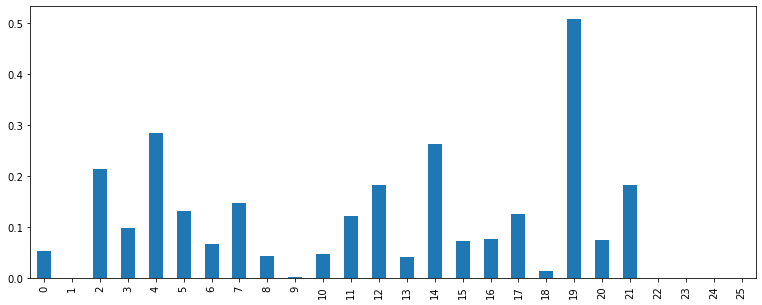

In [28]:
train.groupby(['site_category'])['click'].mean().reset_index()['click'].plot(kind='bar')

In [39]:
counts = train.groupby(['site_category']).size().reset_index(name='counts')
counts 

,site_category,counts
0,0569f928,12971
1,110ab22d,6
2,28905ebd,5551530
3,335d28a8,92102
4,3e814130,2338604
5,50e219e0,11073259
6,72722551,20658
7,75fa27f6,85706
8,76b2941d,55656
9,a818d37a,2638


In [41]:
def group_rare_categories(train, col, min_count=100):
    counts = train.groupby([col]).size().reset_index(name='counts')
    top_categories = counts[counts['counts'] > min_count]
    new_categories = top_categories[col].values
    train[col] = np.array([x if x in new_categories else 'UNK' for x in train[col].values])
    return train

In [42]:
train = group_rare_categories(train, 'site_category', min_count=100)

In [47]:
freq_counts = train.groupby(['site_category']).size().reset_index(name='freq_site_category')

In [48]:
freq_counts["freq_site_category"] = freq_counts["freq_site_category"]/freq_counts["freq_site_category"].sum()

In [49]:
freq_counts

,site_category,freq_site_category
0,0569f928,4.583348e-04
1,28905ebd,1.961652e-01
2,335d28a8,3.254456e-03
3,3e814130,8.263538e-02
4,42a36e14,6.325027e-05
5,50e219e0,3.912774e-01
6,5378d028,9.151854e-06
7,70fb0e29,4.090773e-04
8,72722551,7.299575e-04
9,75fa27f6,3.028451e-03


## Feature Engineering: Frequency encoding

Each category is replaced by the frequency of that category in the training data. Used for tree-based methods.
```
["a", "a", "a", "b", "c"]
```
is encoded as
```
[3/5, 3/5, 3/5, 1/5, 1/5]
```

In [50]:
train.shape

(28300276, 23)

In [51]:
train = pd.merge(train, freq_counts, how="left", on=["site_category"])

In [52]:
train.shape

(28300276, 24)

In [53]:
train.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,freq_site_category
0,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,2,15706,320,50,1722,0,35,65535,79,0.196165
1,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,0f2161f8,...,0,21665,320,50,2493,3,35,65535,117,0.391277
2,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,15707,320,50,1722,0,35,65535,79,0.196165
3,0,14102100,1005,1,85f751fd,c4e18dd6,50e219e0,d644e4e7,2347f47a,0f2161f8,...,0,20751,320,50,1895,0,681,34492,101,0.391277
4,1,14102100,1005,0,929d2171,aa785047,3e814130,ecad2386,7801e8d9,07d7df22,...,0,16920,320,50,1899,0,431,34539,117,0.082635


## Date and time features

* Periodicity
    * Day number in week, month, season, year, second, minute, hour
* Time since
* Difference between dates

In [58]:
# hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
train['hour_enc'] = train['hour'].astype(str)[-2:]
train.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C15,C16,C17,C18,C19,C20,C21,freq_site_category,h,hour_enc
0,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,320,50,1722,0,35,65535,79,0.196165,NaN,NaN
1,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,0f2161f8,...,320,50,2493,3,35,65535,117,0.391277,NaN,NaN
2,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,320,50,1722,0,35,65535,79,0.196165,NaN,NaN
3,0,14102100,1005,1,85f751fd,c4e18dd6,50e219e0,d644e4e7,2347f47a,0f2161f8,...,320,50,1895,0,681,34492,101,0.391277,NaN,NaN
4,1,14102100,1005,0,929d2171,aa785047,3e814130,ecad2386,7801e8d9,07d7df22,...,320,50,1899,0,431,34539,117,0.082635,NaN,NaN


## Feature Engineering: Target or mean encoding
Use the target varible to generate features

In [123]:
data = pd.DataFrame({
        'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'y': [1, 1, 0, 0, 0]})
data

,state,y
0,Ohio,1
1,Ohio,1
2,Ohio,0
3,Nevada,0
4,Nevada,0


In [124]:
m =  pd.DataFrame({'y_mean' : data["y"].groupby(data["state"]).mean()}).reset_index()
m

,state,y_mean
0,Nevada,0.000000
1,Ohio,0.666667


In [125]:
pd.merge(data, m, how="left", on=["state"])

,state,y,y_mean
0,Ohio,1,0.666667
1,Ohio,1,0.666667
2,Ohio,0,0.666667
3,Nevada,0,0.000000
4,Nevada,0,0.000000


Note that mean encodoing needs to be computed on train and joined latter with validation and test.

Regularized mean encoding for the homework.

## Aggregate by one or multiple categorical features

Here are some fetures that we can compute
* Number of times `device_ip` appears on the training data. It would be better if we had `user_id`.
* Number of times `device_ip` appears per month on the training data.
* Min, max, average `C1` per `site_id`.

We can compute these features using `groupby` to aggregate to a new dataframe and then use `merge` to make the new feature.